# Insurance Cost Prediction Linear Regression

 [Health Insurance Cost Prediction](https://www.kaggle.com/annetxu/health-insurance-cost-predicition/data)

* **age:** <br>age of primary beneficiary
* **sex:** <br>insurance contractor gender -- female / male
* **bmi:** <br>Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight $(kg/m^2)$ using the ratio of height to weight, ideally 18.5 to 24.9
* **children:** <br>Number of children covered by health insurance / Number of dependents
* **smoker:** <br>Smoking -- yes / no
* **region:** <br>the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* **charges:** <br>Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
def map_smoking(column):
    mapped=[]
    for value in column:
        if value=="yes":
            mapped.append(1)
        else:
            mapped.append(0)    
    return mapped
df["smoker_norm"]=map_smoking(df["smoker"])

In [4]:
def map_obese(column):
    mapped=[]
    for value in column:
        if value>30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
df["obese"]=map_obese(df["bmi"])

In [5]:
def map_sex(column):
    mapped=[]
    for value in column:
        if value=="female":
            mapped.append(0)
        else:
            mapped.append(1)
    return mapped
df["sex_norm"]=map_sex(df["sex"])

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_norm,obese,sex_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
age            1338 non-null int64
sex            1338 non-null object
bmi            1338 non-null float64
children       1338 non-null int64
smoker         1338 non-null object
region         1338 non-null object
charges        1338 non-null float64
smoker_norm    1338 non-null int64
obese          1338 non-null int64
sex_norm       1338 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 104.6+ KB


In [8]:
df.describe()

,age,bmi,children,charges,smoker_norm,obese,sex_norm
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783,0.526906,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.403694,0.499462,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000


In [9]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_norm', 'obese', 'sex_norm'],
      dtype='object')


# Exploratory Data Analysis (EDA)

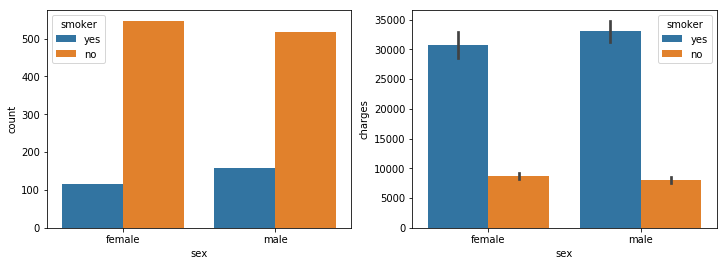

In [10]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x='sex',data=df, hue='smoker', ax = axes[0])
sns.barplot(x='sex', y='charges',data=df, hue='smoker', ax = axes[1]);

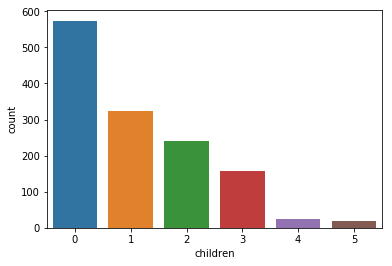

In [11]:
sns.countplot(x="children", data=df);

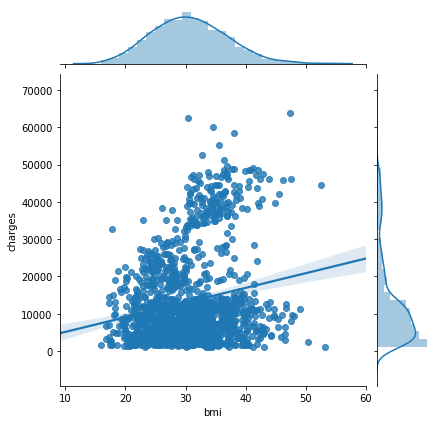

In [12]:
sns.jointplot(x='bmi',y='charges',data=df,kind='reg');

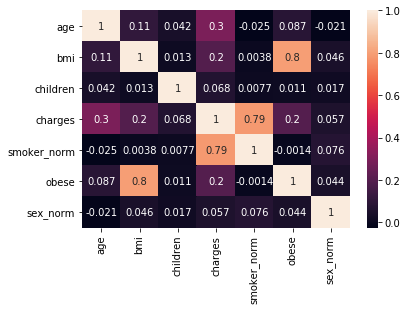

In [13]:
sns.heatmap(df.corr(), annot=True);

# Linear Regression Model 

In [14]:
X = df[['age', 'bmi', 'children','smoker_norm', 'obese']]
y = df['charges']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [16]:
X_train.head()

,age,bmi,children,smoker_norm,obese
612,18,33.155,0,0,1
65,19,28.900,0,0,0
42,41,21.780,1,0,0
533,37,36.190,0,0,1
586,21,20.235,3,0,0


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
# Training the model on our train dataset
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
print(lm.intercept_)

-6569.117523023093


In [21]:
print(lm.coef_)

[  241.39461251    90.26053022   537.54489467 23418.33376791
  4166.66138097]


In [22]:
coeffs = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeffs

,Coefficient
age,241.394613
bmi,90.260530
children,537.544895
smoker_norm,23418.333768
obese,4166.661381


In [23]:
predictions = lm.predict(X_test)

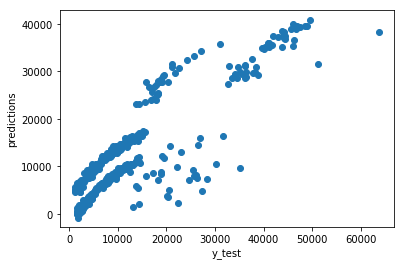

In [24]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions');

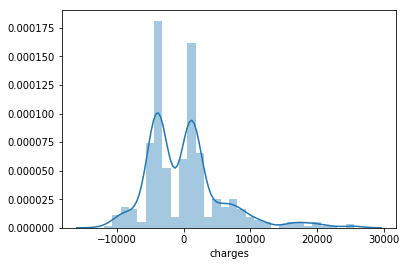

In [25]:
sns.distplot(y_test-predictions,bins=30);

## Regression Evaluation Metrics

In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4244.4865180564075
MSE: 33540220.023688883
RMSE: 5791.391890011319


### BMI categories

Category ------------------------ BMI (kg/m2)Upper limit
* Normal (healthy weight)-----------------25
* Overweight------------------------------30
* Obese Class I (Moderately obese)--------35
* Obese Class II (Severely obese)---------40
* Obese Class III (Very severely obese)---45
* Obese Class IV (Morbidly Obese)--------50
* Obese Class V (Super Obese)------------60

In [27]:
def calculate_insurance(age,obesity,smoking,inter,cof):
    age_c = cof[0]
    bmi_c = cof[2]
    smoker_c = cof[4]
    return (age_c*age)+(bmi_c*obesity)+(smoker_c*smoking)+inter

**use age = 50 and the customer is smoker (smoket = 1) for the complete range of BMI.**

In [28]:
bmi = [25,30,35,40,45,50,60]
age = 50
smoker = 1
insurance=[]
for value in bmi:
    print('For BMI',value,'Insurance will be:',
          calculate_insurance(age,value,smoker,lm.intercept_,lm.coef_))

For BMI 25 Insurance will be: 23105.8968501789
For BMI 30 Insurance will be: 25793.621323548323
For BMI 35 Insurance will be: 28481.345796917747
For BMI 40 Insurance will be: 31169.07027028717
For BMI 45 Insurance will be: 33856.794743656596
For BMI 50 Insurance will be: 36544.51921702602
For BMI 60 Insurance will be: 41919.96816376486
